In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import genextreme

blues = ['#f6eff7',
'#bdc9e1',
'#67a9cf',
'#02818a']

In [2]:
ddir = 'D:/crs/proj/2023_NCB_recovery/'
fn = 'annual_max.csv'
df = pd.read_csv(ddir+fn, header=0)

df.describe()

,Year,ZZ,TWL,R2,R2_95low,R2_95up
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,2000.000000,1.068279,2.278884,1.709651,1.311116,2.164163
std,12.556539,0.209677,0.629550,0.527224,0.404231,0.667227
min,1979.000000,0.818000,1.221000,0.873000,0.670000,1.106000
25%,1989.500000,0.934000,1.803500,1.337500,1.025500,1.693000
50%,2000.000000,1.024000,2.165000,1.533000,1.176000,1.941000
75%,2010.500000,1.090500,2.568000,1.983000,1.520500,2.510000
max,2021.000000,1.795000,3.868000,2.714000,2.081000,3.435000


In [3]:
# I don't understand why I can't select these using column names
YR = df.iloc[:,0].values
ZZ = df.iloc[:,1].values
TWL = df.iloc[:,2].values
R2 = df.iloc[:,3].values

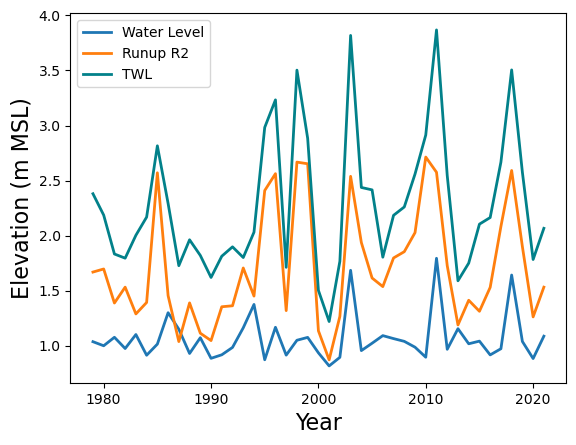

In [9]:
plt.plot(YR, ZZ,lw=2,label='Water Level')
plt.plot(YR, R2,lw=2,label='Runup R2')
plt.plot(YR, TWL,c=blues[3],lw=2,label='TWL')
plt.ylabel('Elevation (m MSL)',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.legend()
plt.savefig(ddir+'annual_max_ts.png', bbox_inches='tight', dpi=200)

In [11]:
# Fit the generalized extreme value distribution to the data.
#https://stackoverflow.com/questions/71202562/calculating-return-value-using-generalised-extreme-value-distribution-gev
shape, loc, scale = genextreme.fit(ZZ)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("Water level return intervals:")
print()
print("Period    ZZ")
print("(years)   (m MSL)")

for period, level in zip(return_periods, return_levels):
    print(f'{period:4.0f}  {level:9.2f}')

Fit parameters:
  shape: -0.2299
  loc:   0.9732
  scale: 0.1084

Water level return intervals:

Period    ZZ
(years)   (m MSL)
   5       1.17
  10       1.29
  20       1.44
  50       1.66
 100       1.86


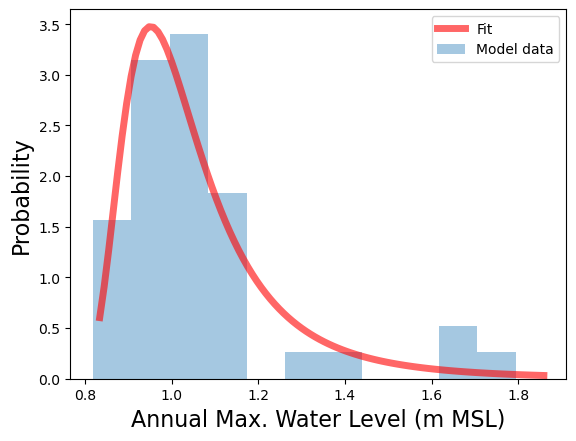

In [13]:
# Plot the shape of water-level fit
fig, ax = plt.subplots(1,1)

x = np.linspace(genextreme.ppf(0.01, shape, loc, scale),
                genextreme.ppf(0.99, shape, loc, scale), 100)
ax.plot(x, genextreme.pdf(x, shape, loc, scale),
       'r-', lw=5, alpha=0.6, label='Fit')
ax.hist(ZZ, density=True, bins='auto', histtype='stepfilled', alpha=.4, label='Model data')
plt.xlabel('Annual Max. Water Level (m MSL)', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.legend()
plt.savefig(ddir+'WL_pdist.png', bbox_inches='tight', dpi=200)

In [14]:
# Fit the generalized extreme value distribution to the data.
shape, loc, scale = genextreme.fit(TWL)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

# Compute the return levels for several return periods.
return_periods = np.array([5, 10, 20, 50, 100])
return_levels = genextreme.isf(1/return_periods, shape, loc, scale)

print("Total vater level return intervals:")
print()
print("Period    TWL")
print("(years)   (m MSL)")

for period, level in zip(return_periods, return_levels):
    print(f'{period:4.0f}  {level:9.2f}')

Fit parameters:
  shape: -0.0459
  loc:   1.9871
  scale: 0.4644

Total vater level return intervals:

Period    TWL
(years)   (m MSL)
   5       2.71
  10       3.09
  20       3.46
  50       3.97
 100       4.37


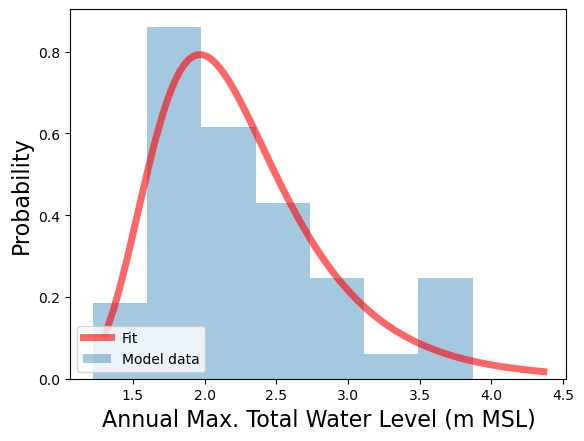

In [17]:
# Plot the shape of TWL
fig, ax = plt.subplots(1,1)

x = np.linspace(genextreme.ppf(0.01, shape, loc, scale),
                genextreme.ppf(0.99, shape, loc, scale), 100)
ax.plot(x, genextreme.pdf(x, shape, loc, scale),
       'r-', lw=5, alpha=0.6, label='Fit')
ax.hist(TWL, density=True, bins='auto', histtype='stepfilled', alpha=.4, label='Model data')
plt.xlabel('Annual Max. Total Water Level (m MSL)', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.legend(loc='lower left')
plt.savefig(ddir+'TWL_pdist.png', bbox_inches='tight', dpi=200)